In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Data Download

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prashant268/chest-xray-covid19-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jorge\.cache\kagglehub\datasets\prashant268\chest-xray-covid19-pneumonia\versions\2


# Model Training

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


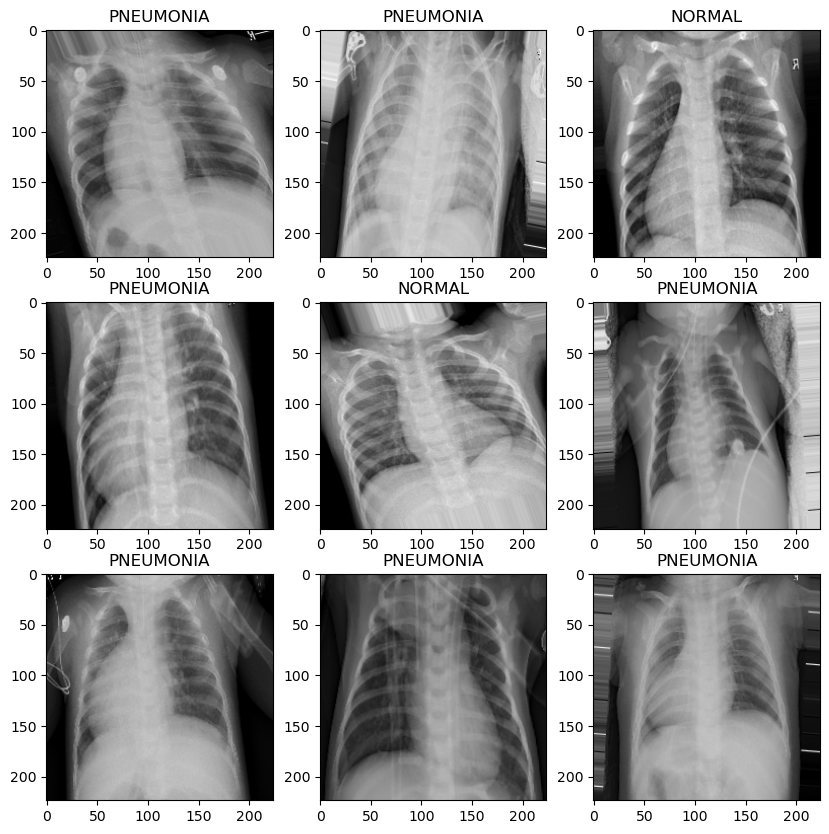

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,432,323 (150.42 MB)

 Trainable params: 39,432,323 (150.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6471 - loss: 0.8770
Epoch 1: val_accuracy improved from -inf to 0.87189, saving model to model_chest_xray_v2.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - accuracy: 0.6474 - loss: 0.8760 - val_accuracy: 0.8719 - val_loss: 0.3698
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7788 - loss: 0.5136
Epoch 2: val_accuracy improved from 0.87189 to 0.90994, saving model to model_chest_xray_v2.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.7789 - loss: 0.5133 - val_accuracy: 0.9099 - val_loss: 0.2819
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8424 - loss: 0.4162
Epoch 3: val_accuracy improved from 0.90994 to 0.92547, saving model to model_chest_xray_v2.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.8424 - loss: 0.4161 - val_accuracy: 0.9255 - val_loss: 0.2313
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8842 - loss: 0.2976
Epoch 4: val_ac

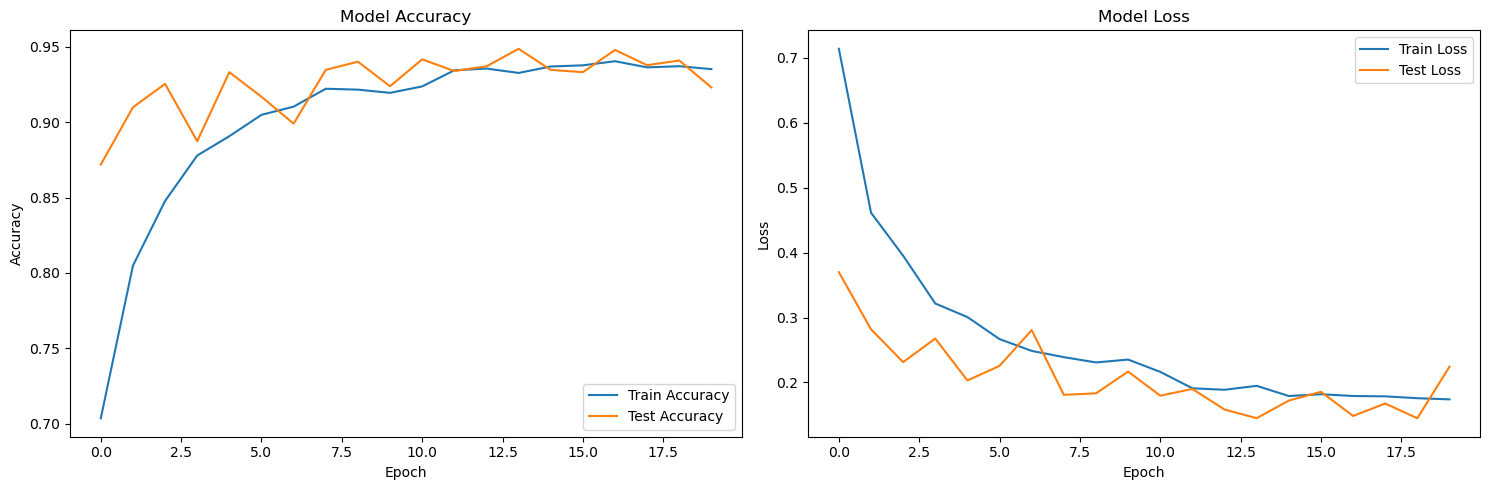

In [21]:
# Download dataset using KaggleHub
#path = kagglehub.dataset_download("prashant268/chest-xray-covid19-pneumonia")
#print("Path to dataset files:", path)
 
# Define dataset directories based on the downloaded path
train_dir = f"{path}\\Data\\train"
test_dir = f"{path}\\Data\\test"
 
# Load dataset using ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Added for better augmentation of medical images
    fill_mode='nearest'  # Handles rotation with zero-padding
)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Updated to use the downloaded dataset path
    target_size=(224, 224),  # Increased size for better feature learning in medical images
    batch_size=32,  # Reduced batch size to prevent memory overload for larger images
    class_mode='categorical'
)
 
# Test dataset (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Updated to use the downloaded dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
 
# Data visualization
sample_images, sample_labels = next(train_generator)
class_labels = train_generator.class_indices
 
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(list(class_labels.keys())[list(class_labels.values()).index(np.argmax(sample_labels[i]))])
plt.show()
 
# Define CNN architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Increased filters
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Added deeper layers to learn more complex features
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),  # More filters to capture details in X-rays
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),  # Increased neurons for more feature extraction
    Dropout(0.5),  # Dropout is slightly reduced due to higher capacity model
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 classes: COVID, Pneumonia, Normal
])
 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
model.summary()
 
# Define callbacks
checkpoint = ModelCheckpoint('model_chest_xray_v2.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
 
# Train the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[checkpoint, early_stopping])
 
# Plotting model accuracy and loss side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
 
# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Test Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
 
# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Test Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
 
plt.tight_layout()
plt.show()

In [25]:
model.save('model_chest_xray_v4.keras')

# Model Evaluation

Found 1288 images belonging to 3 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 809ms/step


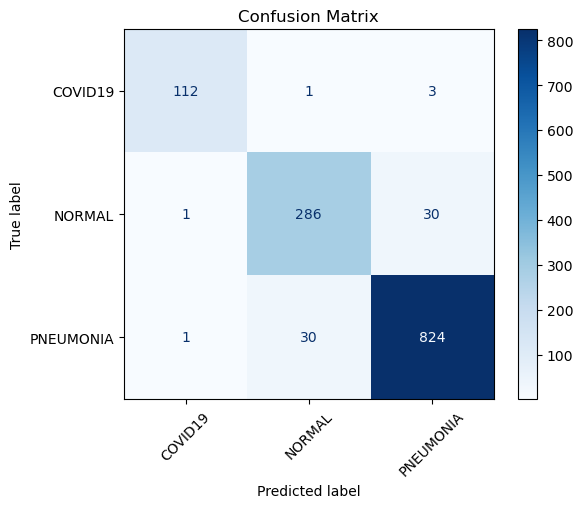

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define test directory path
train_dir = f"{path}\\Data\\train"
test_dir = f"{path}\\Data\\test"  # Update with the actual path to your test data

# Reinitialize the ImageDataGenerator for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images consistent
)

# Load the trained model
model = load_model('model_chest_xray_v2.keras')

# Generate predictions on the test set
test_generator.reset()  # Ensure generator starts from the beginning
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [36]:
# Create a list of dictionaries to store metrics for each class
metrics_list = []

for i, label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    metrics_list.append({
        'Class': label,
        'True Positives (TP)': TP,
        'False Positives (FP)': FP,
        'False Negatives (FN)': FN,
        'True Negatives (TN)': TN
    })

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df.set_index('Class', inplace=True)
metrics_df

,True Positives (TP),False Positives (FP),False Negatives (FN),True Negatives (TN)
Class,,,,
COVID19,112,2,4,1170
NORMAL,286,31,31,940
PNEUMONIA,824,33,31,400
